In [1]:
from useful_graphics import *
from structures import *
import numpy as np
from averager import *

In [2]:
# Set the size of the figure
figsize = (8, 10)

# Remove the axes from the subplots
show_axes = False

# Add a color bar to the subplots
show_colorbar = True

# Set the font size for all text elements
font_size = 10

norm = [-1, 1]

extentXY = []

In [3]:
def calculate_module_of_arrays(our_fields: np.ndarray) -> np.ndarray:
    module_of_fields = np.zeros((our_fields[0].shape))
    module_of_fields = (our_fields[0]**2 + our_fields[1]**2 + our_fields[2]**2)**0.5
    return module_of_fields

In [4]:
png_names = ['original', 'iter_50_3', 'iter_100_3', 'iter_200_3',
             'gauss_iter_1_6', 'gauss_iter_3_6', 'gauss_iter_6_6', 'gauss_iter_10_6']
filenames = ['myfile_3d.csv', 'iter_50.out.csv', 'iter_100.out.csv', 'iter_200.out.csv',
             'gauss_iter_1.out.csv', 'gauss_iter_3.out.csv', 'gauss_iter_6.out.csv', 'gauss_iter_10.out.csv']
columns = ['X Velocity', 'Y Velocity', 'Z Velocity']

In [5]:
data = StreamData("myfile_3d.csv", 501, 981, 81)
x = advance_to_column(data, "X")
y = advance_to_column(data, "Y")
extentXY = [np.min(x), np.max(x), np.max(y), np.min(y)]

myfile_3d.csv
X Velocity
Y Velocity
Z Velocity
iter_50.out.csv
X Velocity
Y Velocity
Z Velocity
iter_100.out.csv
X Velocity
Y Velocity
Z Velocity
iter_200.out.csv
X Velocity
Y Velocity
Z Velocity
gauss_iter_1.out.csv
X Velocity
Y Velocity
Z Velocity
gauss_iter_3.out.csv
X Velocity


c:\all_git_folders\FieldAveraging\usefull_graphics.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Y Velocity
Z Velocity
gauss_iter_6.out.csv
X Velocity
Y Velocity
Z Velocity
gauss_iter_10.out.csv
X Velocity
Y Velocity
Z Velocity


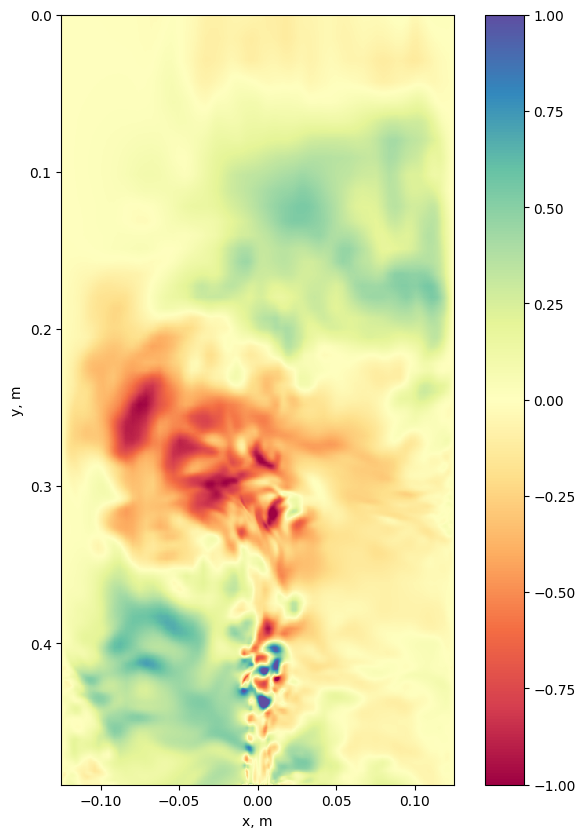

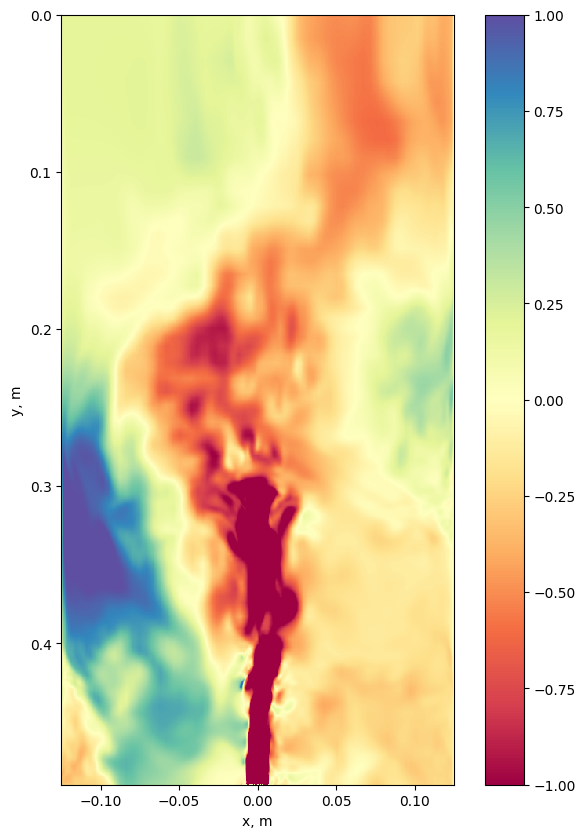

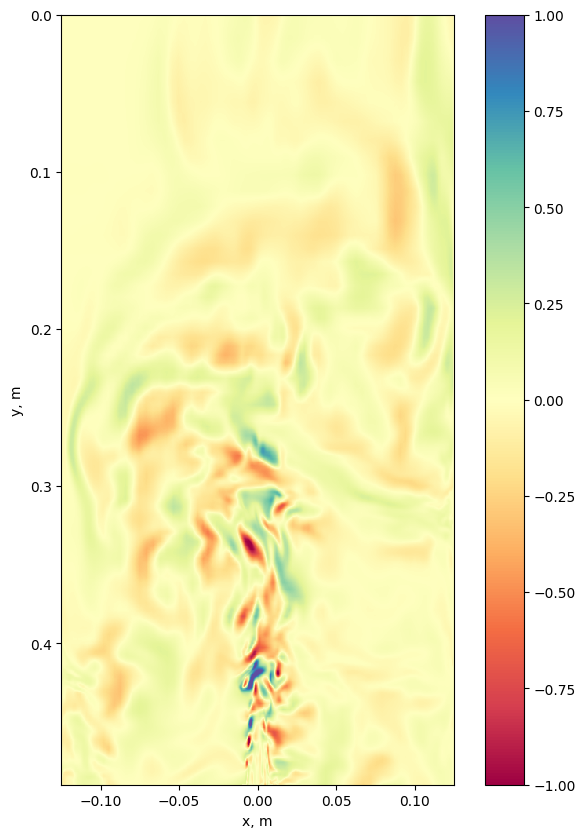

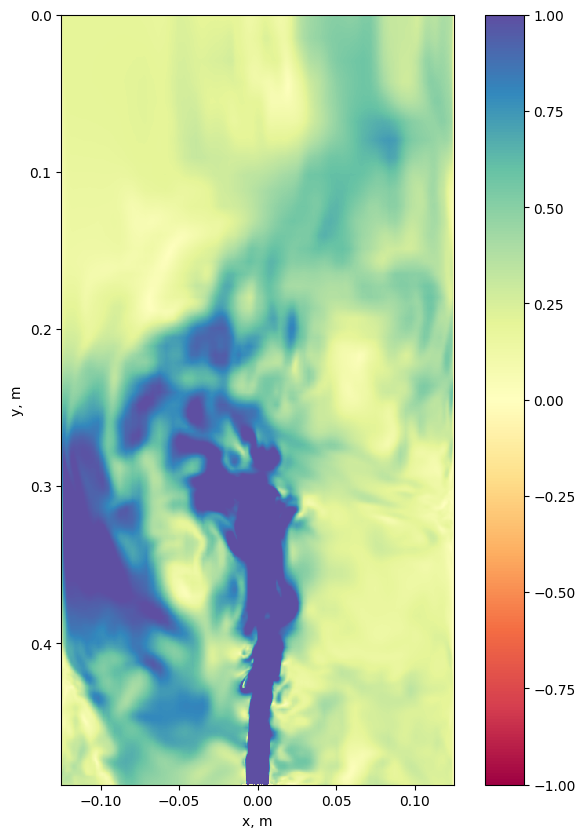

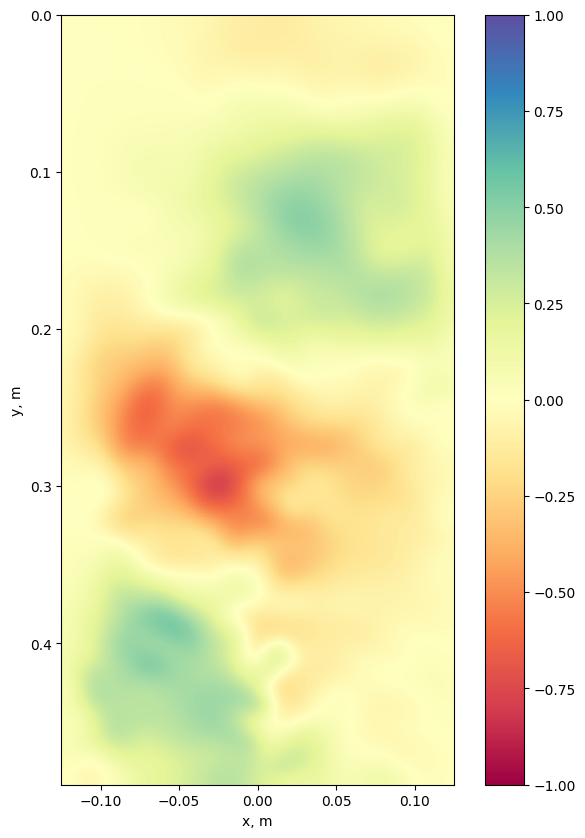

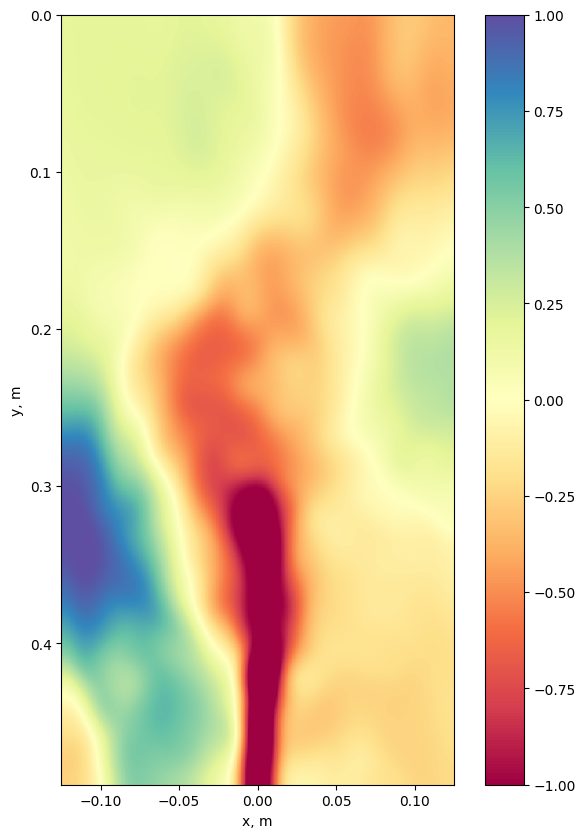

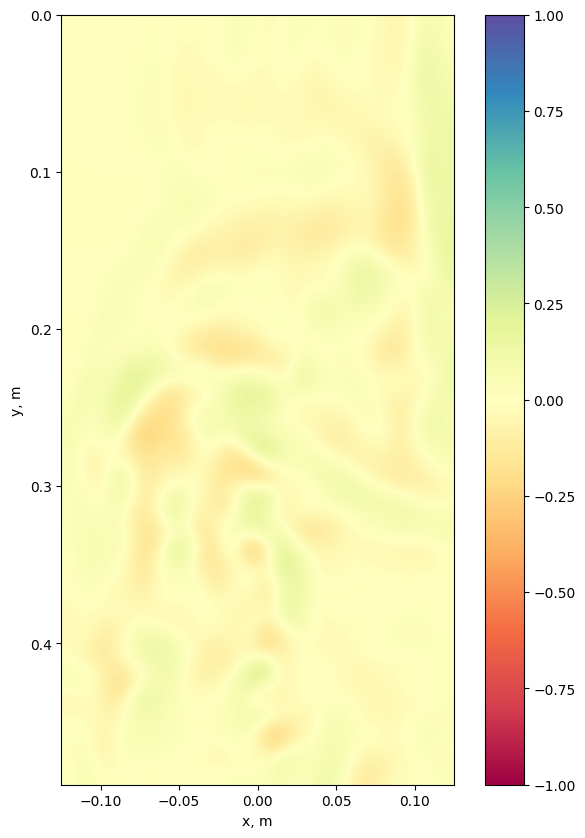

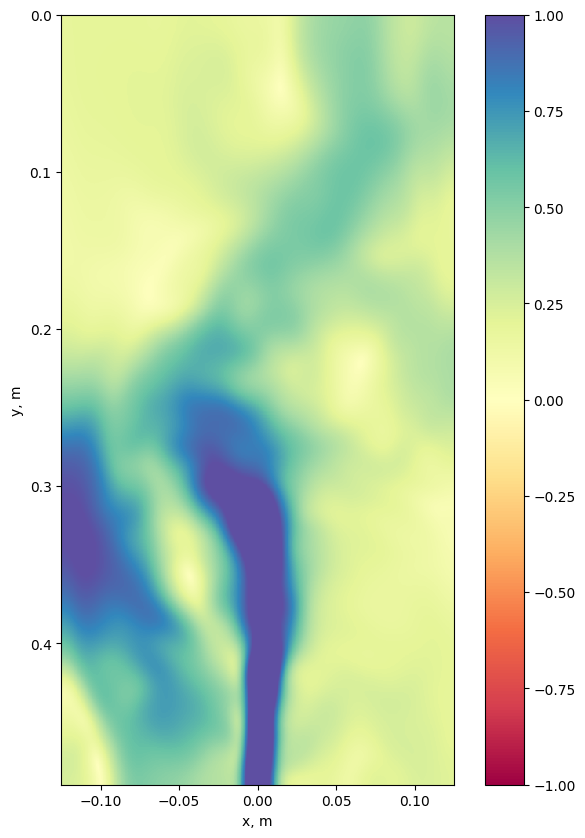

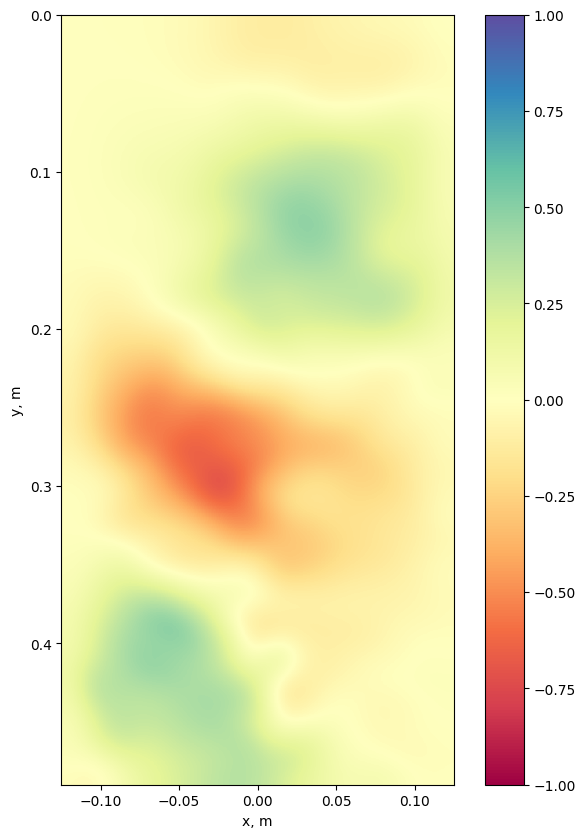

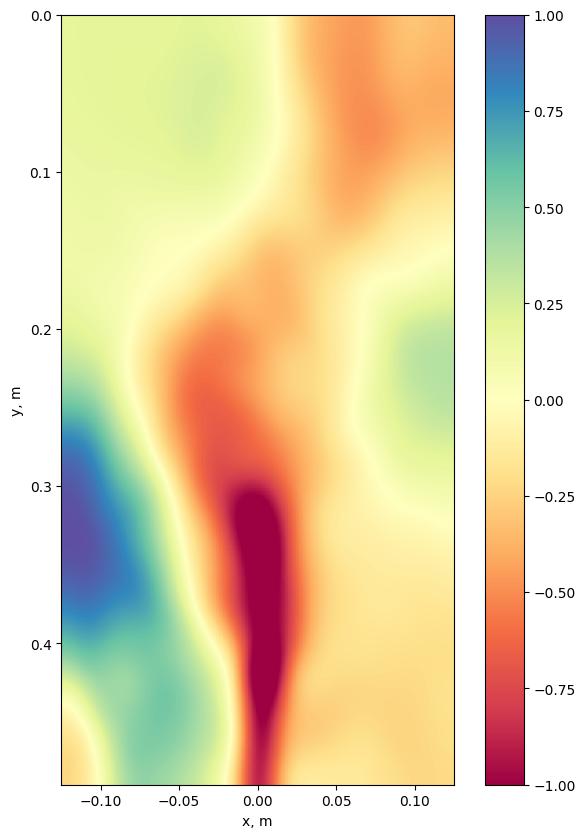

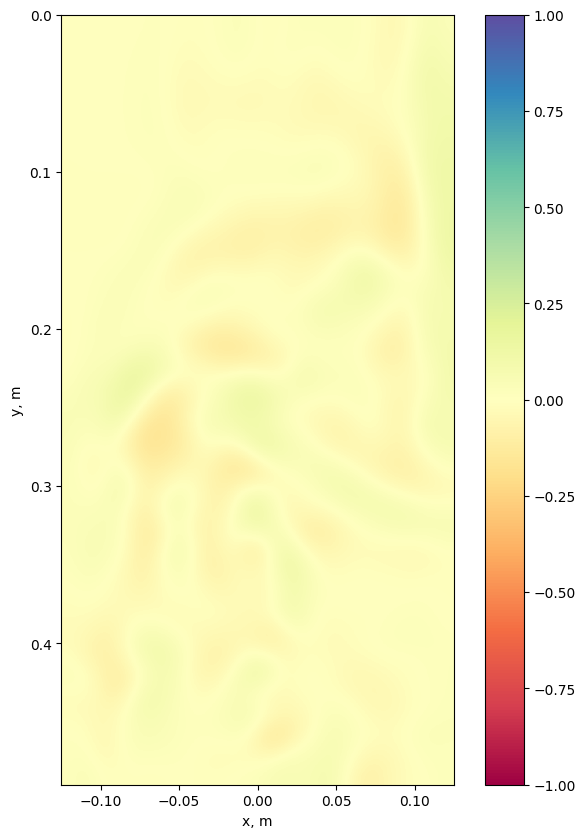

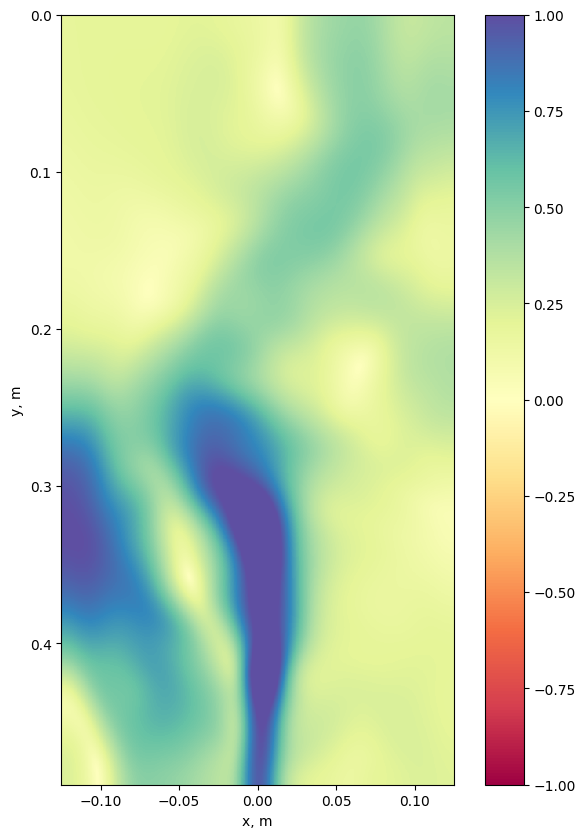

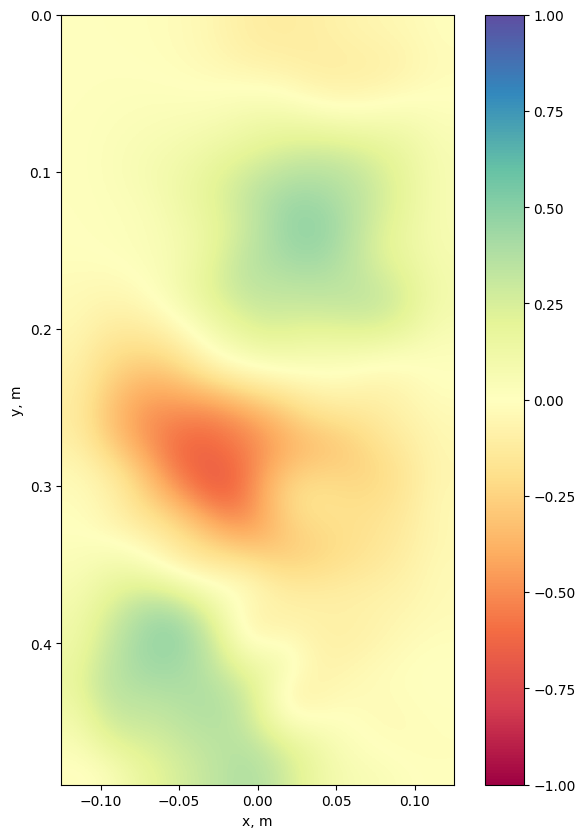

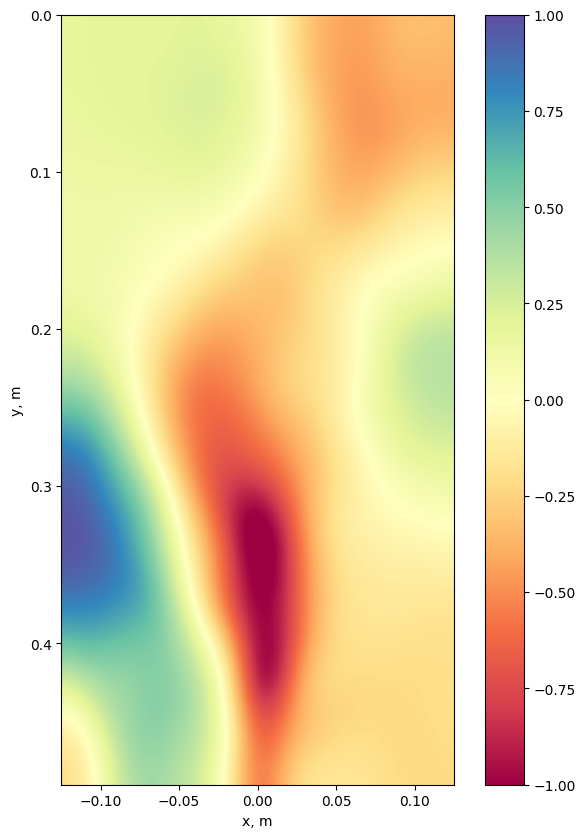

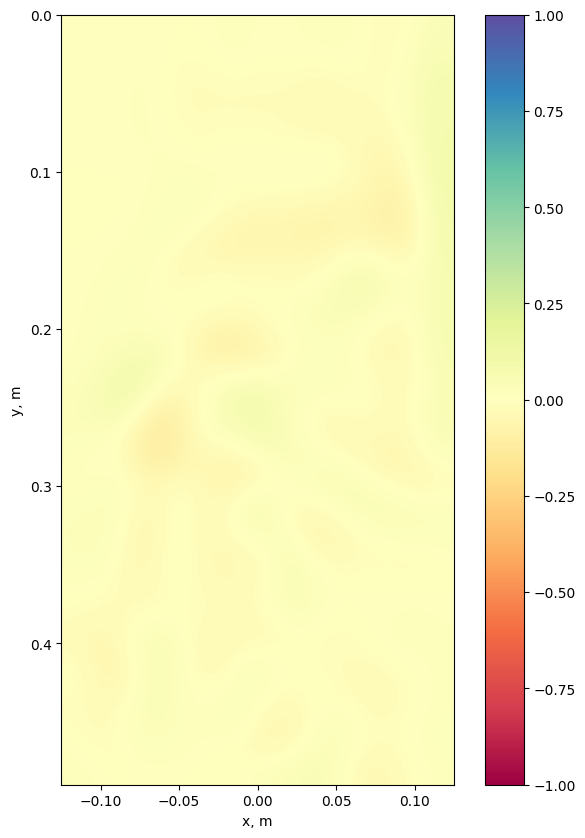

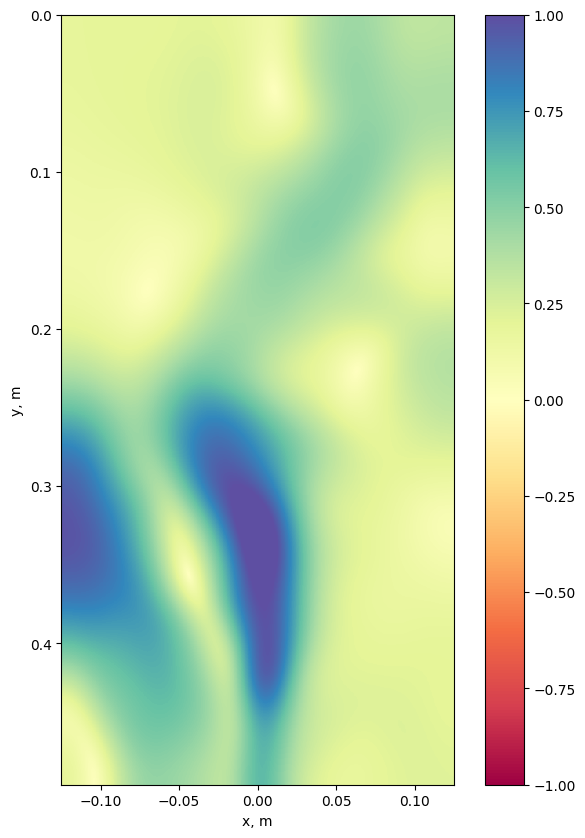

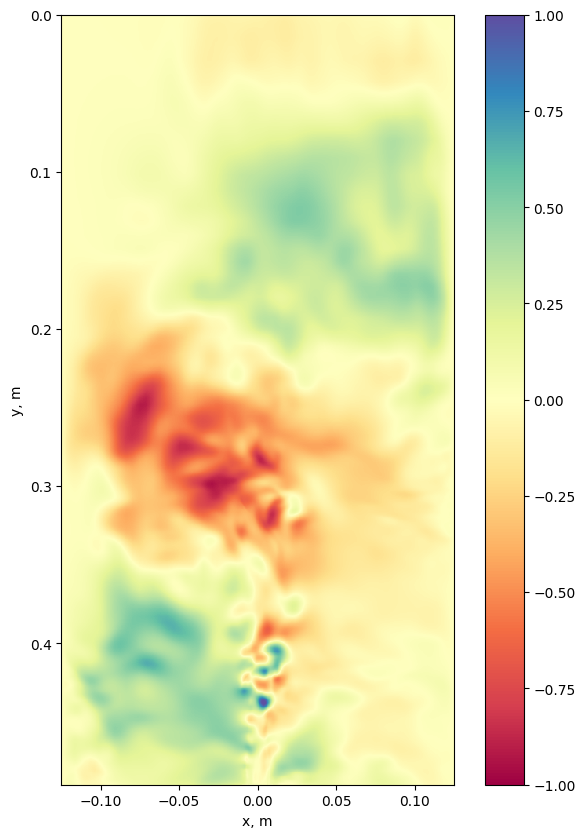

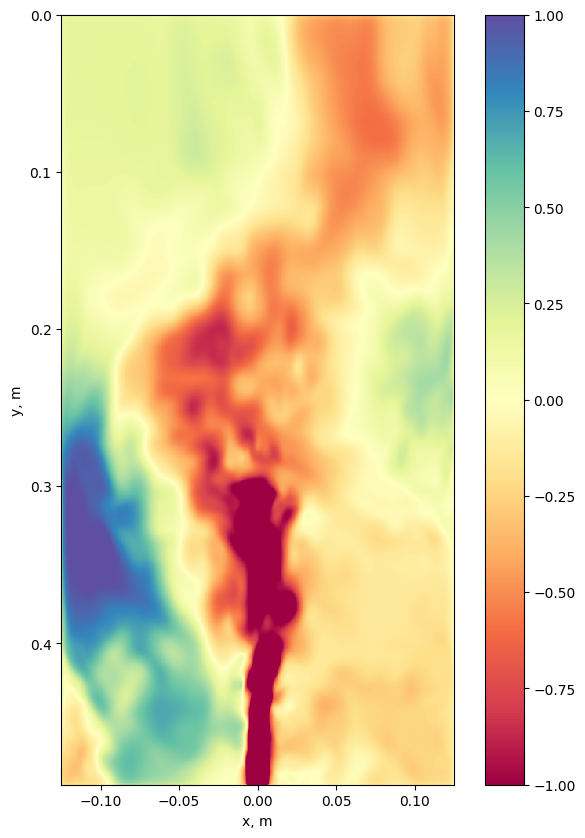

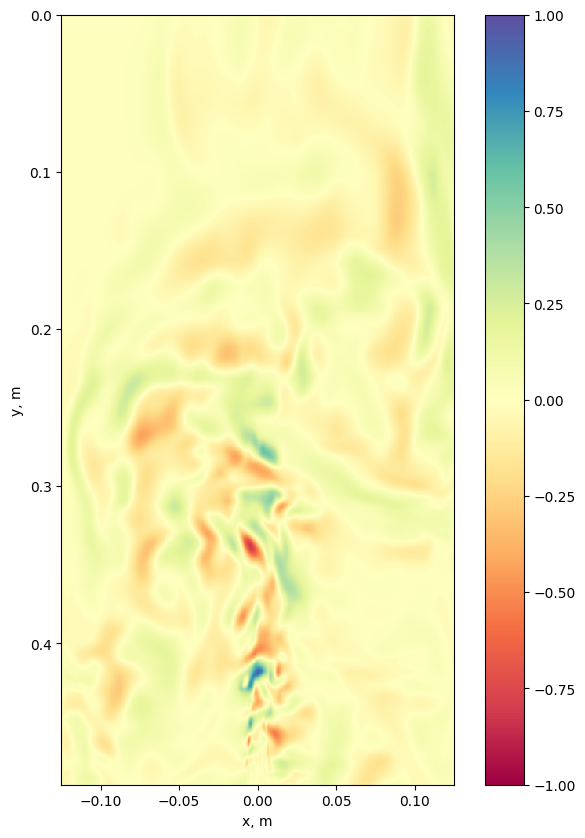

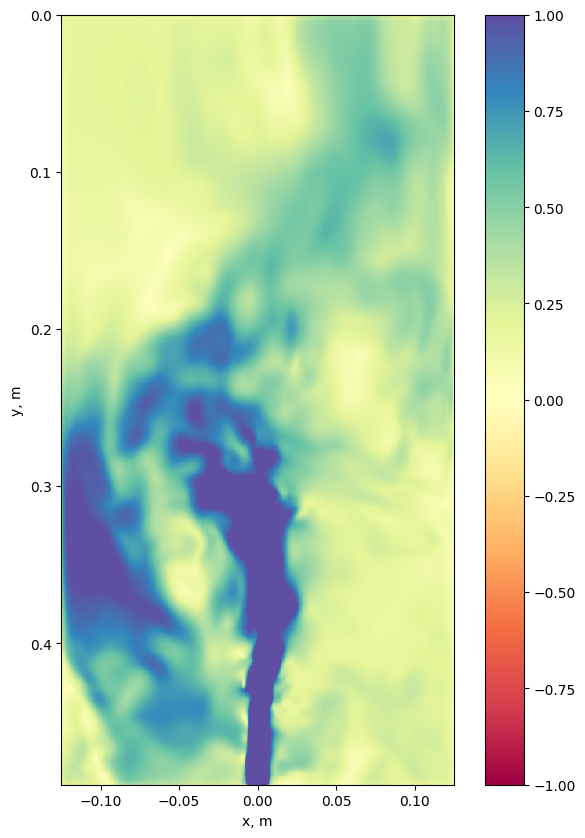

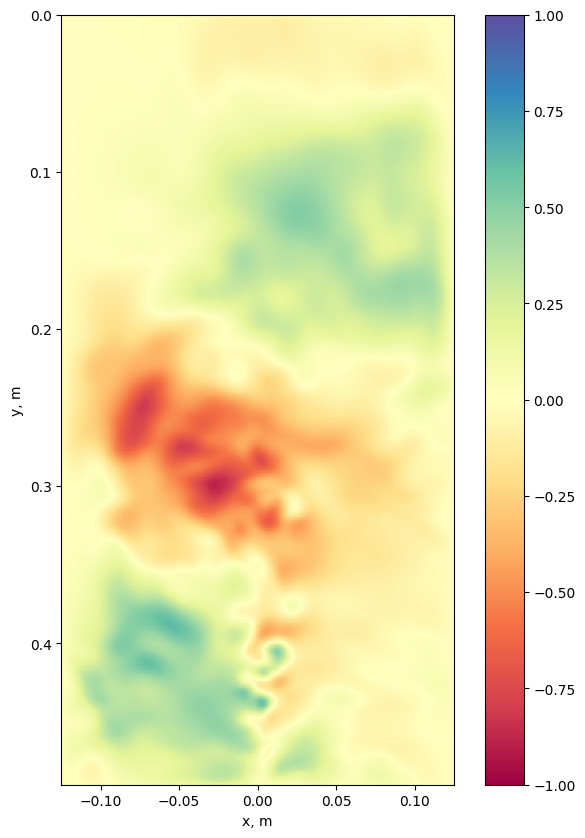

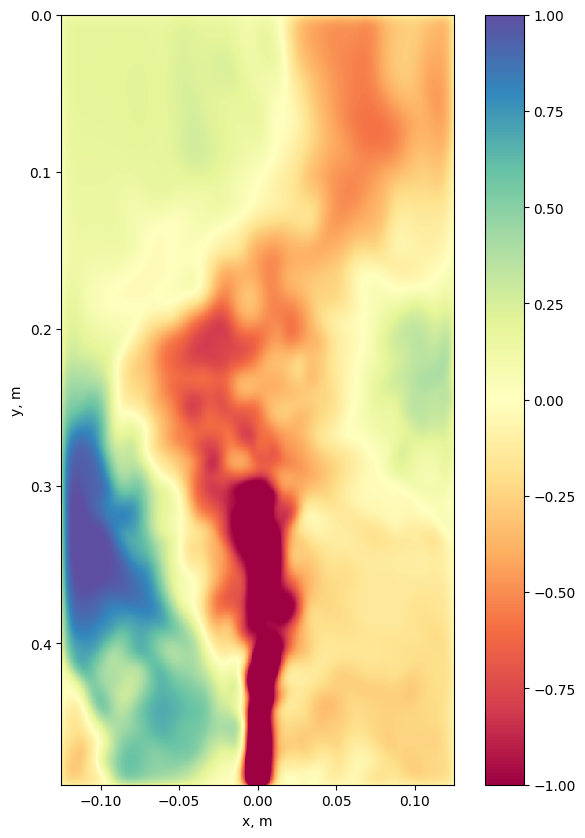

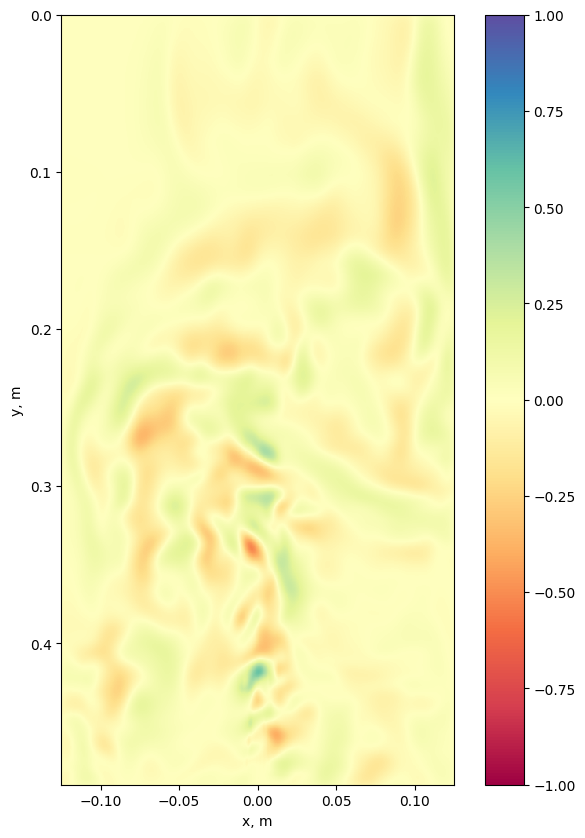

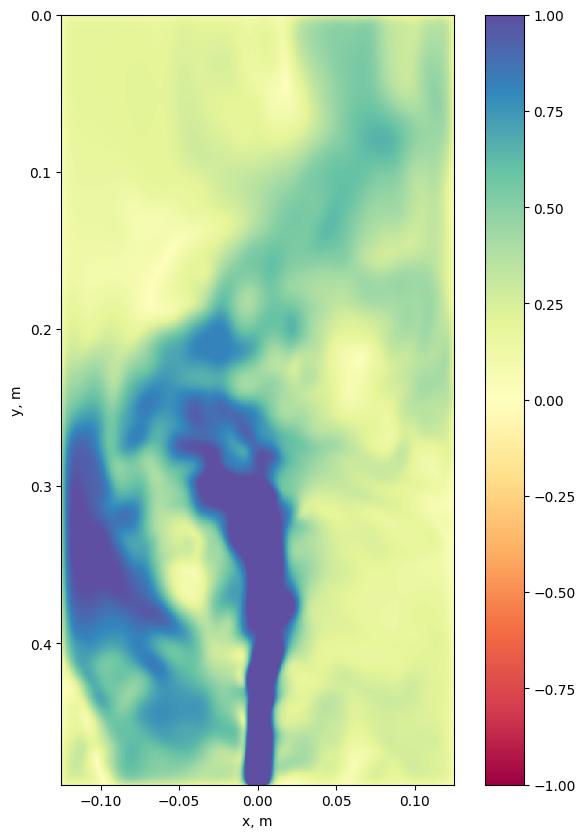

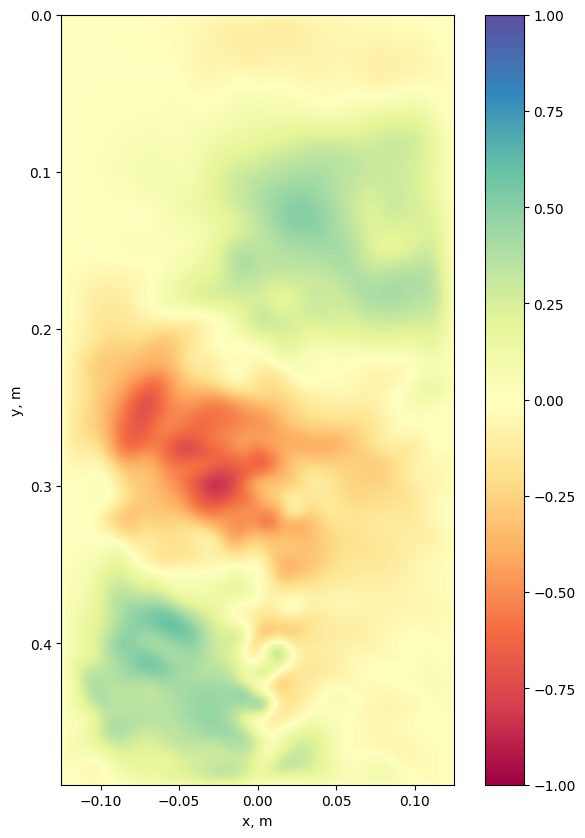

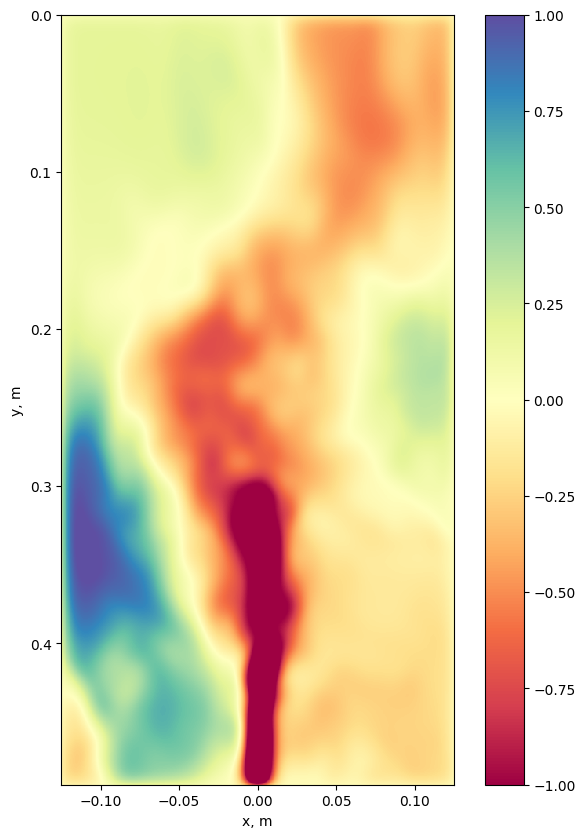

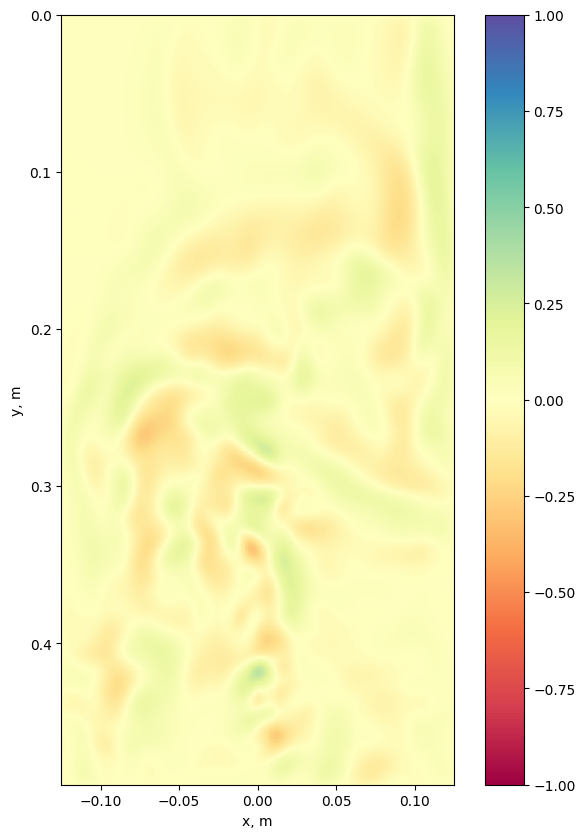

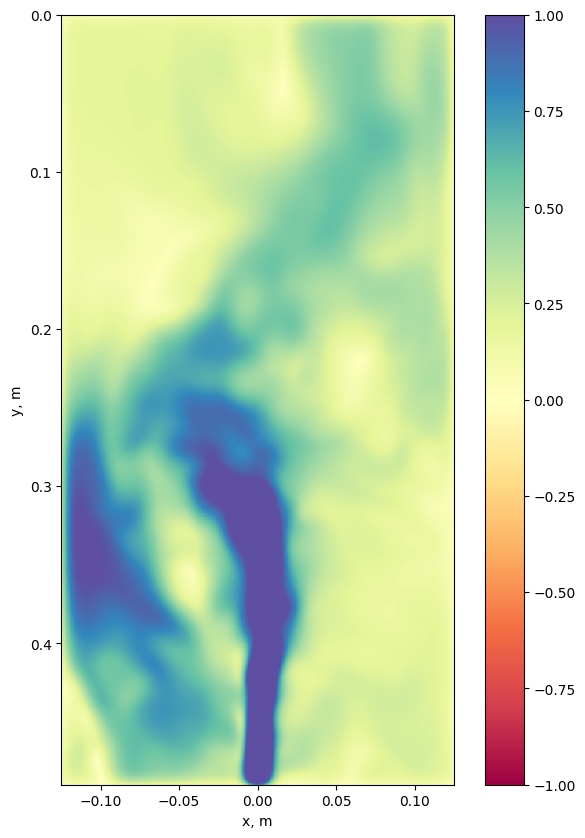

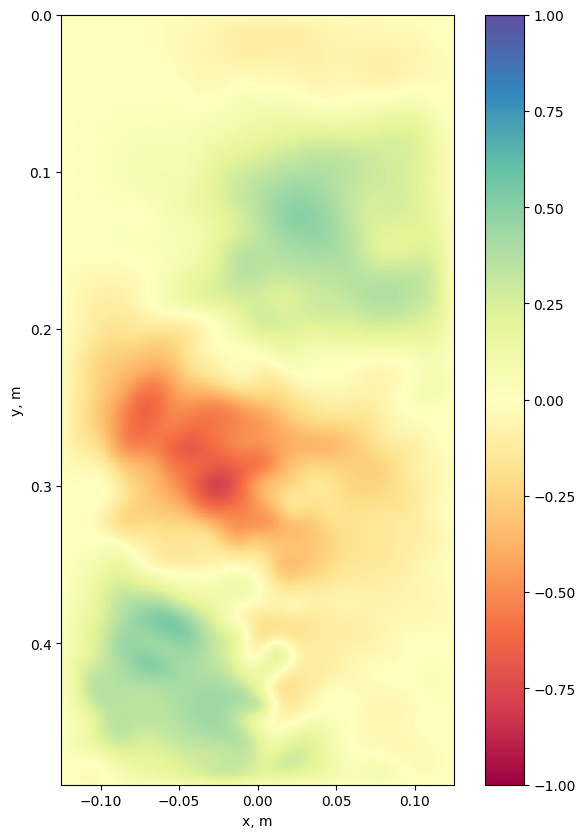

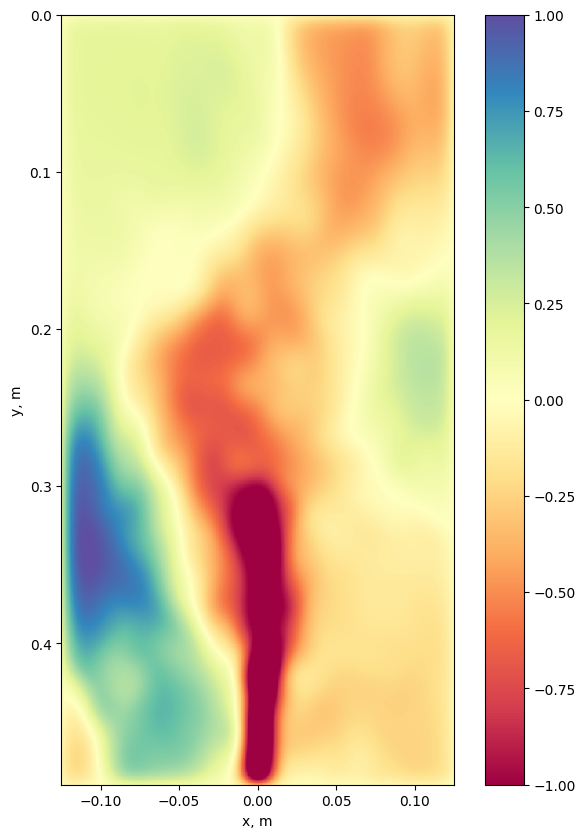

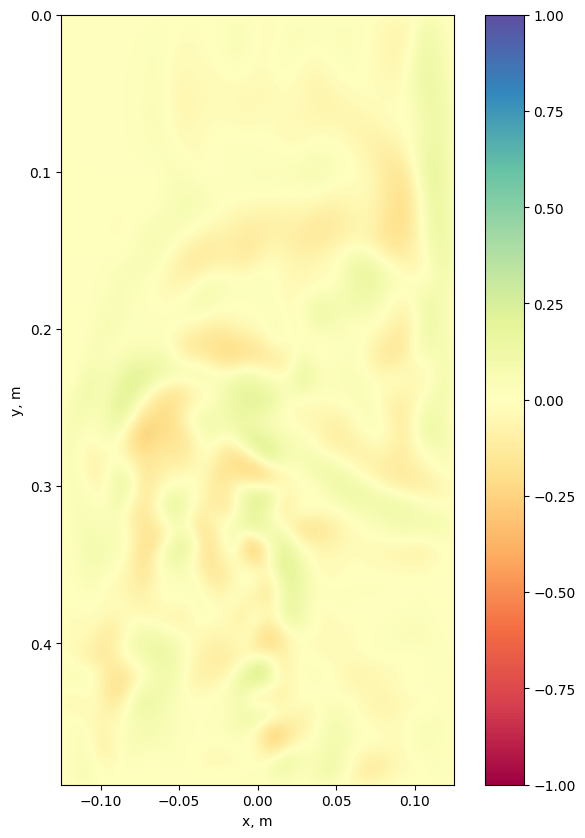

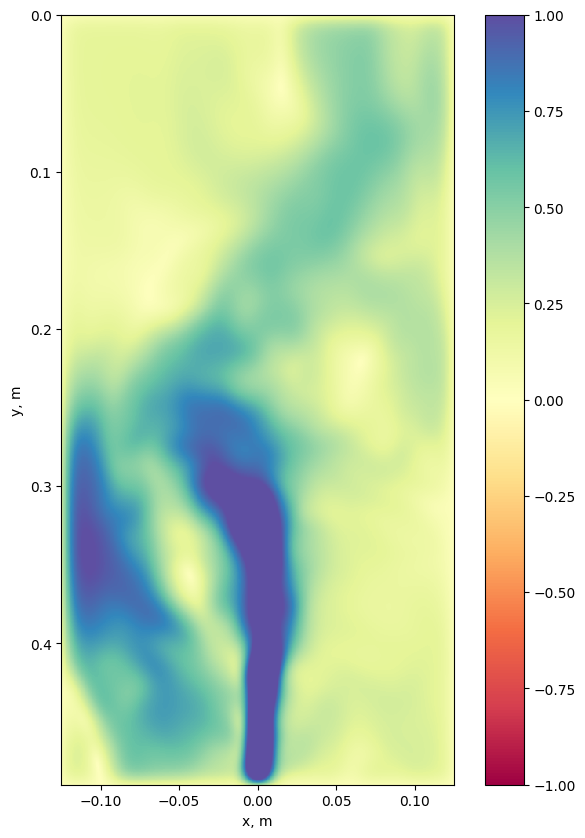

In [6]:
for filename in filenames:
    print(filename)
    data = StreamData(filename, 501, 981, 81)
    data_for_module = []
    for column in columns:
        print(column)
        data_coord = advance_to_column(data, column)
        data_for_module.append(data_coord)
        fig1 = plot_2d(data_coord[41, :, :], xlabel = 'x, m', ylabel = 'y, m', figsize=figsize,
                       show_colorbar=show_colorbar, font_size=font_size, normalize=norm, extent = extentXY)
        fig1.savefig('presentation/' + png_names[filenames.index(filename)] + ' ' + column + '.png', dpi=300, transparent=True)
    data_coord = calculate_module_of_arrays(data_for_module)
    fig1 = plot_2d(data_coord[41, :, :], xlabel = 'x, m', ylabel = 'y, m', figsize=figsize,
                   show_colorbar=show_colorbar, font_size=font_size, normalize=norm, extent = extentXY)
    fig1.savefig('presentation/' + png_names[filenames.index(filename)] + ' Module Velocity' + '.png', dpi=300, transparent=True)


In [7]:
norm = [-1, 1]

In [10]:
gauss_Vy = []
basic_Vy = []

data = StreamData("myfile_3d.csv", 501, 981, 81)
importVy = advance_to_column(data, "Y")
y = importVy[41, :, 251]

importVy = advance_to_column(data, "Y Velocity")
gauss_Vy.append(importVy[41, :, 251])
basic_Vy.append(importVy[41, :, 251])
data = StreamData("gauss_iter_1.out.csv", 501, 981, 81)
importVy = advance_to_column(data, "Y Velocity")
gauss_Vy.append(importVy[41, :, 251])
data = StreamData("gauss_iter_3.out.csv", 501, 981, 81)
importVy = advance_to_column(data, "Y Velocity")
gauss_Vy.append(importVy[41, :, 251])
data = StreamData("gauss_iter_6.out.csv", 501, 981, 81)
importVy = advance_to_column(data, "Y Velocity")
gauss_Vy.append(importVy[41, :, 251])
data = StreamData("gauss_iter_10.out.csv", 501, 981, 81)
importVy = advance_to_column(data, "Y Velocity")
gauss_Vy.append(importVy[41, :, 251])
data = StreamData("iter_50.out.csv", 501, 981, 81)
importVy = advance_to_column(data, "Y Velocity")
basic_Vy.append(importVy[41, :, 251])
data = StreamData("iter_100.out.csv", 501, 981, 81)
importVy = advance_to_column(data, "Y Velocity")
basic_Vy.append(importVy[41, :, 251])
data = StreamData("iter_200.out.csv", 501, 981, 81)
importVy = advance_to_column(data, "Y Velocity")
basic_Vy.append(importVy[41, :, 251])

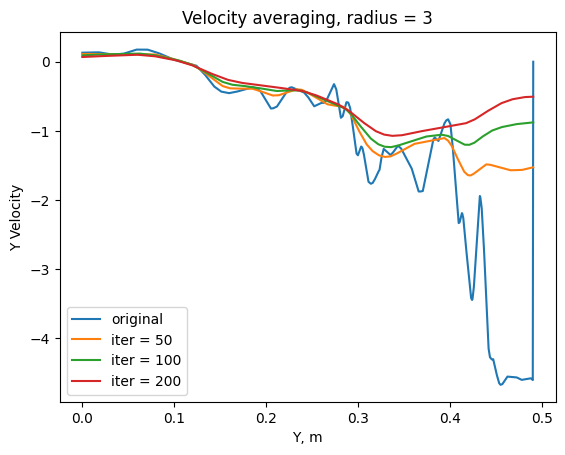

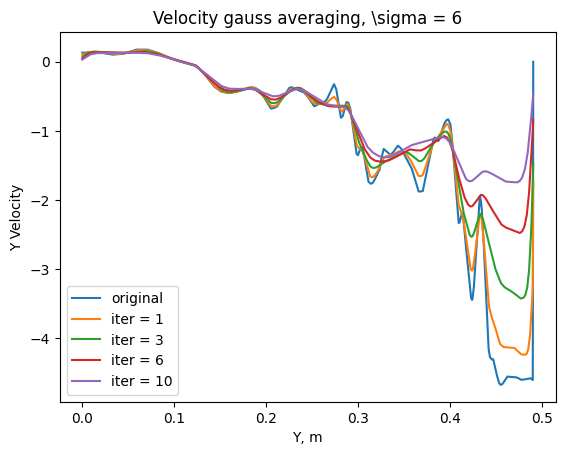

In [12]:
y = y[::-1]
name = ['original', 'iter = 50', 'iter = 100', 'iter = 200']
fig0 = plt.figure()
for i in range(4):
    plt.plot(y, basic_Vy[i], label = name[i])
plt.xlabel("Y, m")
plt.ylabel("Y Velocity")
plt.title("Velocity averaging, radius = 3")
plt.legend()
plt.show
fig0.savefig("Vy_on_y_basic.png", dpi = 300, transparent=True)

name = ['original', 'iter = 1', 'iter = 3', 'iter = 6', 'iter = 10']
fig0 = plt.figure()
for i in range(5):
    plt.plot(y, gauss_Vy[i], label = name[i])
plt.xlabel("Y, m")
plt.ylabel("Y Velocity")
plt.title("Velocity gauss averaging, \sigma = 6")
plt.legend()
plt.show
fig0.savefig("Vy_on_y_gauss.png", dpi = 300, transparent=True)